# Ekstraksi Kata Kunci

*   **NLTK** berfungsi fungsi untuk melakukan tugas-tugas seperti tokenisasi, stemming, lemmatization, analisis sentimen, pengenalan entitas, dan banyak lagi.
*   **Pandas** menyediakan cara yang efisien untuk mengelola dan menganalisis data tabular seperti dataframe.
*   **CountVectorizer** untuk melakukan ekstraksi fitur dalam bentuk term frequency.
*   **numpy** untuk array dan operasi matematika pada array.
*   **re** Ekspresi reguler digunakan untuk pencocokan pola string dan manipulasi teks.
*   **networkx** adalah pustaka Python yang digunakan untuk analisis jaringan atau graf.







In [19]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Memanggil Dataset
data = pd.read_csv("/content/drive/MyDrive/ppw/ppw/crawling_berita_pb.csv")
data

,Judul,Isi,Kategori
0,Erik Ten Hag Tolak 'Bejek' Skuad Setan Merah U...,POJOKBACA.ID -PelatihManchester United(MU)Eri...,Sport
1,Muhaimin Minta Jokowi Adil di Pilpres 2024: Is...,"JAKARTA, POJOKBACA.ID -Bakal calon wakil pres...",Politik
2,"Sedang Bermain dan Berbagi Peran, Megawati-Jok...","JAKARTA, POJOKBACA.ID -Polemik politik tanah a...",Politik
3,Prabowo Subianto Kunjungi SBY Sebelum Daftar C...,"BOGOR, POJOKBACA.ID- Ketua Umum Partai Gerind...",Politik
4,Universitas Gunadarma Ciptakan Robot Catur Cap...,"JAKARTA, POJOKBACA.ID– Robot Catur benar-bena...",Sport
...,...,...,...
431,Ketua Umum Pro Jokowi: Prabowo - Gibran Akan M...,"SOLO, POJOKBACA.ID -Ketua Umum ProJokowi(Proj...",Politik
432,"Ganjar-Mahfud Didukung Ratusan Pedagang Pasar,...","MATARAM, POJOKBACA.ID -Ratusan pedagang canan...",Politik
433,PLN Unit Induk Distribusi Jakarta Raya Gelar A...,"JAKARTA, POJOKBACA.ID- Gelaran sepakbola akba...",Sport
434,Jadwal Siaran langsung Timnas Indonesia U-17 d...,"POJOKBACA.ID -PadaPiala Dunia U-172023,Timnas...",Sport


In [3]:
# Memberikan nomer pada dokumen
data['Dokumen ke'] = data.reset_index(drop=True).index + 1
data

,Judul,Isi,Kategori,Dokumen ke
0,Erik Ten Hag Tolak 'Bejek' Skuad Setan Merah U...,POJOKBACA.ID -PelatihManchester United(MU)Eri...,Sport,1
1,Muhaimin Minta Jokowi Adil di Pilpres 2024: Is...,"JAKARTA, POJOKBACA.ID -Bakal calon wakil pres...",Politik,2
2,"Sedang Bermain dan Berbagi Peran, Megawati-Jok...","JAKARTA, POJOKBACA.ID -Polemik politik tanah a...",Politik,3
3,Prabowo Subianto Kunjungi SBY Sebelum Daftar C...,"BOGOR, POJOKBACA.ID- Ketua Umum Partai Gerind...",Politik,4
4,Universitas Gunadarma Ciptakan Robot Catur Cap...,"JAKARTA, POJOKBACA.ID– Robot Catur benar-bena...",Sport,5
...,...,...,...,...
431,Ketua Umum Pro Jokowi: Prabowo - Gibran Akan M...,"SOLO, POJOKBACA.ID -Ketua Umum ProJokowi(Proj...",Politik,432
432,"Ganjar-Mahfud Didukung Ratusan Pedagang Pasar,...","MATARAM, POJOKBACA.ID -Ratusan pedagang canan...",Politik,433
433,PLN Unit Induk Distribusi Jakarta Raya Gelar A...,"JAKARTA, POJOKBACA.ID- Gelaran sepakbola akba...",Sport,434
434,Jadwal Siaran langsung Timnas Indonesia U-17 d...,"POJOKBACA.ID -PadaPiala Dunia U-172023,Timnas...",Sport,435


In [4]:
# Memanggil dokumen dengan nomer yang digunakan sebagai percobaan
data_2 = data[data['Dokumen ke'] == 2]
data_2

,Judul,Isi,Kategori,Dokumen ke
1,Muhaimin Minta Jokowi Adil di Pilpres 2024: Is...,"JAKARTA, POJOKBACA.ID -Bakal calon wakil pres...",Politik,2


## Tokenize Kalimat

In [ ]:
# membuat list untuk hasil tokenize
hasil_kalimat=[]
# Melakukan perulangan untuk memisahkan berita per-kalimat
for i in range(len(data_2)):
  token = sent_tokenize(data['Isi'][i])
  hasil_kalimat.append(token)

In [ ]:
# membuat list untuk hasil transpose tokenize sebelumnya
kalimat = []
# melakukan perulangan untuk merubah hasil tokenize / transpose data
for i in range(len(hasil_kalimat)):
  for x in range (len(hasil_kalimat[i])):
    datacek = []
    datacek.append(i)
    datacek.append(hasil_kalimat[i][x])
    kalimat.append(datacek)
# kalimat

In [ ]:
databaru = pd.DataFrame(kalimat, columns=['Dokumen ke','kalimat'])
databaru.loc[:, 'Dokumen ke'] = 2
# databaru

## Cleansing

In [5]:
#Remove Puncutuation tidak termasuk menghapus spasi
# menghilangkan Tag (@)
clean_tag = re.compile('@\S+')
# menghilangkan url (https?:\/\/)
clean_url = re.compile('https?:\/\/.*[\r\n]*')
# menghilangkan hastag (#)
clean_hastag = re.compile('#\S+')
# menghilangkan simbol (^a-zA-Z)
clean_symbol = re.compile('[^a-zA-Z]')
def clean_punct(text):
    text = clean_tag.sub('', str(text))
    text = clean_url.sub('', text)
    text = clean_hastag.sub(' ', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = data_2['Isi'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,Isi
1,JAKARTA POJOKBACA ID Bakal calon wakil pres...


## Tokenize Stopword Removal

*   Dilakukan proses tokenisasi setiap kalimat.
*   Hasil tokenisasi dilakukan penghapusan kata yang tidak penting

In [6]:
# Unduh stop words dari nltk
stop_words = set(stopwords.words('indonesian'))
# Fungsi untuk menghapus stop words dari setiap kalimat
def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Terapkan fungsi pada kolom 'Kalimat' dalam DataFrame
stopword = clean['Isi'].apply(remove_stopwords)
stopword =pd.DataFrame(stopword)
stopword

,Isi
1,JAKARTA POJOKBACA ID calon wakil presidenMuhai...


## Co-Occurrence Matriks

Matriks co-occurrence (co-occurrence matrix) adalah suatu representasi statistik dari hubungan antara dua atau lebih elemen dalam suatu himpunan data. Ide dasarnya adalah untuk mengukur seberapa sering suatu pasangan elemen muncul bersama-sama dalam suatu kumpulan data.

In [7]:
# Menghitung matriks co-occurrence dengan CountVectorizer
vectorizer = CountVectorizer()
co_occurrence_matrix = vectorizer.fit_transform(clean['Isi']).T * vectorizer.fit_transform(clean['Isi'])

# Membuat DataFrame dari matriks co-occurrence
df_co_occurrence = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
df_co_occurrence

,acara,akan,anaknya,anies,antara,baca,bahwa,bakal,bangsa,bantai,...,ummat,umum,untuk,usai,wakil,wib,widodo,wormuth,yakni,yang
acara,1,2,2,3,1,3,1,6,2,1,...,1,2,1,1,2,1,2,1,2,1
akan,2,4,4,6,2,6,2,12,4,2,...,2,4,2,2,4,2,4,2,4,2
anaknya,2,4,4,6,2,6,2,12,4,2,...,2,4,2,2,4,2,4,2,4,2
anies,3,6,6,9,3,9,3,18,6,3,...,3,6,3,3,6,3,6,3,6,3
antara,1,2,2,3,1,3,1,6,2,1,...,1,2,1,1,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wib,1,2,2,3,1,3,1,6,2,1,...,1,2,1,1,2,1,2,1,2,1
widodo,2,4,4,6,2,6,2,12,4,2,...,2,4,2,2,4,2,4,2,4,2
wormuth,1,2,2,3,1,3,1,6,2,1,...,1,2,1,1,2,1,2,1,2,1
yakni,2,4,4,6,2,6,2,12,4,2,...,2,4,2,2,4,2,4,2,4,2


Pembentukan Graph : Setiap kata yang memiliki hubungan dengan kata lain dan nilai Term frequency lebih dari 5 akan dibentuk node yang saling terhubung

## Pagerank
**TextRank** adalah suatu algoritma ekstraksi rangking teks yang digunakan untuk mengekstrak informasi utama atau rangkuman dari suatu teks. Algoritma ini didasarkan pada konsep PageRank, yang awalnya dikembangkan oleh Google untuk menilai kualitas dan relevansi halaman web dalam hasil pencarian. TextRank digunakan dalam konteks pemrosesan bahasa alami dan pengolahan teks. Sehingga dari penjelasan tersebut Textrank digunakan untuk mencari kata paling penting dalam sebuah dokumen.

Dalam kasus kali ini PageRank mengukur otoritas atau kepentingan suatu kata berdasarkan seberapa banyak kata lain yang mengaitkan ke kata tersebut dan seberapa pentingnya kata-kata yang memberikan tautan tersebut.

### **Algoritma Textrank**



1.   Tokenisasi (Teks awal dibagi menjadi token atau unit-unit teks yang lebih kecil)
2.   Pembobotan Kata / Co-Occurrence Matriks (Setiap kata atau frasa diberi bobot berdasarkan karakteristik tertentu)
3.   Membangun Graf Berbobot (Kata-kata atau frasa dinyatakan sebagai simpul dalam graf, dan hubungan antara mereka dinyatakan sebagai tepi)
4.   TextRank (Algoritma PageRank digunakan untuk menghitung skor keterkaitan atau signifikansi dari setiap simpul dalam graf. Dalam konteks TextRank, simpul yang mendapatkan skor tertinggi dianggap sebagai kata-kata atau frasa yang paling penting.)

dikarenakan konsep dari Textrank sama dengan Pagerank maka rumus Pagerank dapat digunakan untuk menghitung Textrank.

**Rumus Pagerank :**

$\text{PR(A)}=\frac{d}{N} + \left( 1 - d\right)\left( \sum_{}^{} \frac{\text{Rank(i)}}{Outlink(i)} \right)$



*   PR(i) adalah PageRank dari kata A
*   d adalah faktor damping (biasanya 0.85 untuk Google PageRank)
*   N adalah jumlah total kata


### **Contoh manual Pagerank**

https://docs.google.com/spreadsheets/d/1kGmqOQ2q3RcFOXFjrEiYRdj3qA8L7OLl/edit?usp=sharing&ouid=102642560487377842579&rtpof=true&sd=true


In [20]:
G = nx.DiGraph()
for idx, row in df_co_occurrence.iterrows():
    for col in df_co_occurrence.columns:
        weight = df_co_occurrence.loc[idx, col]
        if weight > 30 and idx != col:
            G.add_edge(idx, col, weight=weight)

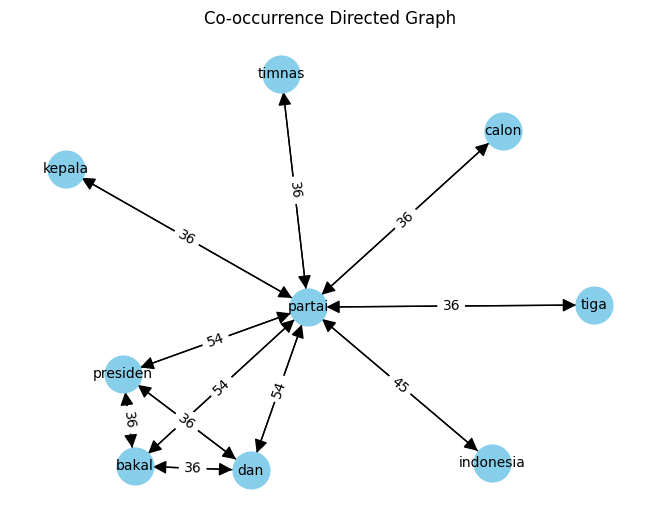

In [21]:
# Menampilkan graf
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Co-occurrence Directed Graph")
plt.show()

In [23]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:4]
sorted_d

[('partai', 0.36903524863219894),
 ('bakal', 0.12624278988303878),
 ('dan', 0.12624278988303878),
 ('presiden', 0.12624278988303878)]

In [17]:
# Hitung centrality pada berita 1 dengan closeness
closeness_centrality = nx.closeness_centrality(G)
# Ubah ke dalam dataframe
closeness_df = pd.DataFrame(list(closeness_centrality.items()), columns=['Kata', 'Closeness Centrality'])
closeness_df = closeness_df.sort_values(by='Closeness Centrality', ascending=False)
closeness_df

,Kata,Closeness Centrality
2,partai,1.000000
0,bakal,0.615385
1,dan,0.615385
3,presiden,0.615385
4,calon,0.533333
5,indonesia,0.533333
6,kepala,0.533333
7,tiga,0.533333
8,timnas,0.533333
